<a href="https://colab.research.google.com/github/anitashar/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/AS_LS_DS_112_Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to filter a dataframe based on conditions
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-12-24 20:19:41--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.201.80.203, 44.241.68.111, 54.202.200.60
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.201.80.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [              <=>   ]  22.37M  6.17MB/s    in 4.5s    

2020-12-24 20:19:48 (4.96 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23452842]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [28]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","1956.75","1956.75","4744.7","4744.70","3643.25","1101.45","0.0","0.0","0.0","Nov-2020","190.21","Dec-2020","Nov-2020","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [6]:
import pandas as pd

df = pd.read_csv('LoanStats_2018Q4.csv')
print(df.shape)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128415, 1)


In [7]:
df.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                 emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt   total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       6000      6000        6000             36 months  16.14%  211.36      C     C4        Facility Maintenance Tech 3 years    RENT           40000      Source Verified     Dec-2018 Fully Paid  n          NaN NaN  other              Other              217xx    MD         3.75  0           Aug-2008         0              NaN                    NaN                    9        0       5580      10.4%      15        w                   0.00      0.00          6425.40063376 6425.40         6000.00         425.40        0.0                0.0        0.0                     May-2019     5588.03         NaN          Jan-2020           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              924          6785        0           0           0           0           NaN                0            NaN     1           2           4230       12       53800            1      0           1            3                    754         42920          11.5    0                        0           NaN                124                  10                    10             0        53                   NaN                      0                     NaN                            0                     2              2               4           7         0         8             14            2                   9        0                0            0                  1                  100            0            

In [15]:
df = pd.read_csv('LoanStats_2018Q4.csv',skiprows=1, skipfooter=2, engine ='python')

In [17]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000,6000,6000.0,36 months,16.14%,211.36,C,C4,Facility Maintenance Tech,3 years,RENT,40000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,other,Other,217xx,MD,3.75,0,Aug-2008,0,NaN,NaN,9,0,5580,10.4%,15,w,0.00,0.00,6425.400634,6425.40,...,0.0,0,0,55383,6785,48500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,36 months,16.91%,890.20,C,C5,Captain,3 years,RENT,67000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,671xx,KS,13.18,0,Aug-1996,3,46.0,NaN,16,0,17053,29.3%,20,w,10499.56,10499.56,20439.370000,20439.37,...,10.0,0,0,66400,23438,42400,8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,40000,40000,40000.0,60 months,11.31%,875.90,B,B3,NaN,< 1 year,MORTGAGE,136000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,480xx,MI,15.41,0,Apr-2006,0,72.0,NaN,12,0,34283,81%,22,w,29112.11,29112.11,18356.200000,18356.20,...,75.0,0,0,179159,62143,25000,42409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,May-2020,Mar-2020,2.0,2.0,GRACE_CURRENT,613.57,32887.60,875.90,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000.0,60 months,15.02%,833.02,C,C3,elementary school teacher,10+ years,MORTGAGE,106095.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,017xx,MA,15.38,1,Mar-1998,0,2.0,NaN,9,0,19518,83.1%,14,w,24536.67,24536.67,19115.650000,19115.65,...,100.0,0,0,499675,72376,21000,72510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000.0,36 months,11.31%,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,284xx,NC,9.66,0,Oct-2007,0,NaN,NaN,8,0,1070,17.5%,27,w,2497.47,2497.47,3285.470000,3285.47,...,0.0,0,0,125853,144979,3600,119753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,May-2020,2.0,0.0,ACTIVE,58.80,3121.41,164.43,N,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(128412, 144)

In [26]:
#  show no of rows or columns
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',100)

In [27]:
df.isnull().sum().sort_values()

loan_amnt                                          0
mo_sin_rcnt_rev_tl_op                              0
mo_sin_old_rev_tl_op                               0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
total_cu_tl                                        0
inq_fi                                             0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
open_il_12m                                        0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                  

In [21]:
#  drop the coulmns

df = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)

print(df.shape)
df.head()

(128412, 140)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,6000,6000,6000.0,36 months,16.14%,211.36,C,C4,Facility Maintenance Tech,3 years,RENT,40000.0,Source Verified,Dec-2018,Fully Paid,n,other,Other,217xx,MD,3.75,0,Aug-2008,0,NaN,NaN,9,0,5580,10.4%,15,w,0.00,0.00,6425.400634,6425.40,6000.00,425.40,0.0,0.0,...,0.0,0,0,55383,6785,48500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,36 months,16.91%,890.20,C,C5,Captain,3 years,RENT,67000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,671xx,KS,13.18,0,Aug-1996,3,46.0,NaN,16,0,17053,29.3%,20,w,10499.56,10499.56,20439.370000,20439.37,14500.44,5938.93,0.0,0.0,...,10.0,0,0,66400,23438,42400,8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,40000,40000,40000.0,60 months,11.31%,875.90,B,B3,NaN,< 1 year,MORTGAGE,136000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,480xx,MI,15.41,0,Apr-2006,0,72.0,NaN,12,0,34283,81%,22,w,29112.11,29112.11,18356.200000,18356.20,10887.89,7468.31,0.0,0.0,...,75.0,0,0,179159,62143,25000,42409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,May-2020,Mar-2020,2.0,2.0,GRACE_CURRENT,613.57,32887.60,875.90,N,NaN,NaN,NaN,NaN,NaN,NaN
3,35000,35000,35000.0,60 months,15.02%,833.02,C,C3,elementary school teacher,10+ years,MORTGAGE,106095.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,017xx,MA,15.38,1,Mar-1998,0,2.0,NaN,9,0,19518,83.1%,14,w,24536.67,24536.67,19115.650000,19115.65,10463.33,8652.32,0.0,0.0,...,100.0,0,0,499675,72376,21000,72510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,5000,5000,5000.0,36 months,11.31%,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,284xx,NC,9.66,0,Oct-2007,0,NaN,NaN,8,0,1070,17.5%,27,w,2497.47,2497.47,3285.470000,3285.47,2502.53,782.94,0.0,0.0,...,0.0,0,0,125853,144979,3600,119753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,May-2020,2.0,0.0,ACTIVE,58.80,3121.41,164.43,N,NaN,NaN,NaN,NaN,NaN,NaN


## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [29]:
pd.set_option('display.max_row',140)
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [31]:
# first cell value of int_rate--we see leading spce and % sign in this col values
df['int_rate'][0]

' 16.14%'

In [37]:
type(df['int_rate'][0])

str

In [34]:
df['int_rate'][0].strip().strip('%')

'16.14'

In [35]:
float(df['int_rate'][0].strip().strip('%'))

16.14

In [38]:
type(float(df['int_rate'][0].strip().strip('%')))

float

In [41]:
int_rate =  ' 16.14%'
type(int_rate)

str

In [43]:
int_rate.strip().strip('%')

'16.14'

In [44]:
float(int_rate.strip().strip('%'))

16.14

Apply the function to the `int_rate` column

In [45]:
def int_to_float(int_rate):
  return float(int_rate.strip().strip('%'))

In [48]:
df['int_rate']=df['int_rate'].apply(int_to_float)

In [49]:
df['int_rate'].head()

0    16.14
1    16.91
2    11.31
3    15.02
4    11.31
Name: int_rate, dtype: float64

### Clean `emp_title`

Look at top 20 titles

In [53]:
df['emp_title'].value_counts().head(20)

Teacher                     2090
Manager                     1773
Registered Nurse             952
Driver                       924
RN                           726
Supervisor                   697
Sales                        580
Project Manager              526
General Manager              523
Office Manager               521
Owner                        420
Director                     402
Truck Driver                 387
Operations Manager           387
Nurse                        326
Engineer                     325
Sales Manager                304
manager                      301
Supervisor                   270
Administrative Assistant     269
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [56]:
# unique values
df['emp_title'].nunique()

43892

In [54]:
# missing value or null value
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [62]:
import numpy as np
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

def clean_title(title):
  if isinstance(title,str):
    return title.strip().title()
  else:
    return "Unknown"

In [63]:
for example in examples:
  print(clean_title(example)) 

Owner
Supervisor
Project Manager
Unknown


### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [64]:
df['emp_title']= df['emp_title'].apply(clean_title)

In [66]:
df['emp_title'].isnull().sum()

0

In [67]:
df['emp_title'].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [68]:
df['emp_title'].nunique()

34902

In [71]:
# list comprehension
[clean_title(title) for title in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [72]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [73]:
df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [74]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format= True)

In [75]:
df['issue_d'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [76]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_d, Length: 128412, dtype: int64

In [77]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
128407    10
128408    10
128409    10
128410    10
128411    10
Name: issue_d, Length: 128412, dtype: int64

In [80]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

In [81]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month
0,6000,6000,6000.0,36 months,16.14,211.36,C,C4,Facility Maintenance Tech,3 years,RENT,40000.0,Source Verified,2018-12-01,Fully Paid,n,other,Other,217xx,MD,3.75,0,Aug-2008,0,NaN,NaN,9,0,5580,10.4%,15,w,0.00,0.00,6425.400634,6425.40,6000.00,425.40,0.0,0.0,0.0,May-2019,5588.03,NaN,Jan-2020,0,NaN,1,Individual,NaN,...,14,2,9,0.0,0,0,1,100.0,0.0,0,0,55383,6785,48500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
1,25000,25000,25000.0,36 months,16.91,890.20,C,C5,Captain,3 years,RENT,67000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,671xx,KS,13.18,0,Aug-1996,3,46.0,NaN,16,0,17053,29.3%,20,w,10499.56,10499.56,20439.370000,20439.37,14500.44,5938.93,0.0,0.0,0.0,Nov-2020,890.20,Dec-2020,Nov-2020,0,46.0,1,Individual,NaN,...,17,9,16,0.0,0,0,5,89.5,10.0,0,0,66400,23438,42400,8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
2,40000,40000,40000.0,60 months,11.31,875.90,B,B3,Unknown,< 1 year,MORTGAGE,136000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,480xx,MI,15.41,0,Apr-2006,0,72.0,NaN,12,0,34283,81%,22,w,29112.11,29112.11,18356.200000,18356.20,10887.89,7468.31,0.0,0.0,0.0,Nov-2020,875.90,Dec-2020,Nov-2020,0,NaN,1,Individual,NaN,...,14,8,12,0.0,0,0,2,86.4,75.0,0,0,179159,62143,25000,42409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,May-2020,Mar-2020,2.0,2.0,GRACE_CURRENT,613.57,32887.60,875.90,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
3,35000,35000,35000.0,60 months,15.02,833.02,C,C3,Elementary School Teacher,10+ years,MORTGAGE,106095.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,017xx,MA,15.38,1,Mar-1998,0,2.0,NaN,9,0,19518,83.1%,14,w,24536.67,24536.67,19115.650000,19115.65,10463.33,8652.32,0.0,0.0,0.0,Nov-2020,833.02,Dec-2020,Nov-2020,0,NaN,1,Individual,NaN,...,7,3,9,0.0,0,0,0,85.7,100.0,0,0,499675,72376,21000,72510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
4,5000,5000,5000.0,36 months,11.31,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,284xx,NC

In [82]:
df['earliest_cr_line'].head()

0    Aug-2008
1    Aug-1996
2    Apr-2006
3    Mar-1998
4    Oct-2007
Name: earliest_cr_line, dtype: object

In [83]:
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)

In [84]:
df['earliest_cr_line'].head()

0   2008-08-01
1   1996-08-01
2   2006-04-01
3   1998-03-01
4   2007-10-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [85]:
(df['issue_d'] - df['earliest_cr_line']).dt.days

0          3774
1          8157
2          4627
3          7580
4          4079
          ...  
128407    12114
128408    13241
128409     4505
128410     3652
128411     4413
Length: 128412, dtype: int64

In [86]:
df['credit_length']= (df['issue_d'] - df['earliest_cr_line']).dt.days/365

In [87]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,credit_length
0,6000,6000,6000.0,36 months,16.14,211.36,C,C4,Facility Maintenance Tech,3 years,RENT,40000.0,Source Verified,2018-12-01,Fully Paid,n,other,Other,217xx,MD,3.75,0,2008-08-01,0,NaN,NaN,9,0,5580,10.4%,15,w,0.00,0.00,6425.400634,6425.40,6000.00,425.40,0.0,0.0,0.0,May-2019,5588.03,NaN,Jan-2020,0,NaN,1,Individual,NaN,...,2,9,0.0,0,0,1,100.0,0.0,0,0,55383,6785,48500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,10.339726
1,25000,25000,25000.0,36 months,16.91,890.20,C,C5,Captain,3 years,RENT,67000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,671xx,KS,13.18,0,1996-08-01,3,46.0,NaN,16,0,17053,29.3%,20,w,10499.56,10499.56,20439.370000,20439.37,14500.44,5938.93,0.0,0.0,0.0,Nov-2020,890.20,Dec-2020,Nov-2020,0,46.0,1,Individual,NaN,...,9,16,0.0,0,0,5,89.5,10.0,0,0,66400,23438,42400,8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,22.347945
2,40000,40000,40000.0,60 months,11.31,875.90,B,B3,Unknown,< 1 year,MORTGAGE,136000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,480xx,MI,15.41,0,2006-04-01,0,72.0,NaN,12,0,34283,81%,22,w,29112.11,29112.11,18356.200000,18356.20,10887.89,7468.31,0.0,0.0,0.0,Nov-2020,875.90,Dec-2020,Nov-2020,0,NaN,1,Individual,NaN,...,8,12,0.0,0,0,2,86.4,75.0,0,0,179159,62143,25000,42409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,May-2020,Mar-2020,2.0,2.0,GRACE_CURRENT,613.57,32887.60,875.90,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,12.676712
3,35000,35000,35000.0,60 months,15.02,833.02,C,C3,Elementary School Teacher,10+ years,MORTGAGE,106095.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,017xx,MA,15.38,1,1998-03-01,0,2.0,NaN,9,0,19518,83.1%,14,w,24536.67,24536.67,19115.650000,19115.65,10463.33,8652.32,0.0,0.0,0.0,Nov-2020,833.02,Dec-2020,Nov-2020,0,NaN,1,Individual,NaN,...,3,9,0.0,0,0,0,85.7,100.0,0,0,499675,72376,21000,72510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,20.767123
4,5000,5000,5000.0,36 months,11.31,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,2018-12-01,Current,n,debt_cons

In [88]:
df['credit_length'].describe()

count    128412.000000
mean         16.054497
std           7.908317
min           3.084932
25%          11.093151
50%          14.427397
75%          19.846575
max          68.961644
Name: credit_length, dtype: float64

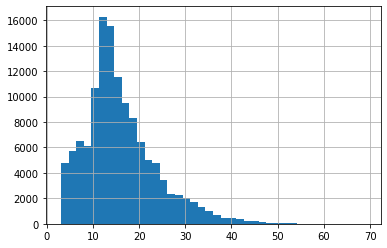

In [90]:
df['credit_length'].hist(bins=40);